# Ejercicio 1: *Clustering*

### 1. Importa los datos

Importa el dataset *drugLibTrain_raw.csv*. Se trata de un *dataset* con diferentes fármacos, sus efectos y ratings de los clientes.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

import warnings

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('data/drugLibTrain_raw.csv')
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### 2. Análisis descriptivo

Quedate únicamente con las columnas que podamos manejar: columnas numéricas y columnas categoricas con pocas categorias (menos de 10).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 194.3+ KB


In [9]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,502,NaN,5,5,1426,3031,2813,3046
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [10]:
df.nunique()

urlDrugName           502
rating                 10
effectiveness           5
sideEffects             5
condition            1426
benefitsReview       3031
sideEffectsReview    2813
commentsReview       3046
dtype: int64

In [11]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [12]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [13]:
pd.get_dummies(df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
3102,False,True,False,False,False
3103,False,False,True,False,False
3104,False,False,False,True,False
3105,True,False,False,False,False


In [14]:
my_dict = {"Ineffective":0, 
           "Marginally Effective":1, 
           "Moderately Effective":2, 
           "Considerably Effective":3, 
           "Highly Effective":4}

df['effectiveness_int'] = df['effectiveness'].map(my_dict)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [15]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [16]:
my_dict = {"No Side Effects":0, 
           "Mild Side Effects":1, 
           "Moderate Side Effects":2, 
           "Severe Side Effects":3, 
           "Extremely Severe Side Effects":4}

df['sideEffects_int'] = df['sideEffects'].map(my_dict)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


In [17]:
X = df[['rating', "effectiveness_int","sideEffects_int"]]
X

,rating,effectiveness_int,sideEffects_int
0,4,4,1
1,1,4,3
2,10,4,0
3,3,1,1
4,2,1,3
...,...,...,...
3102,10,4,1
3103,1,0,4
3104,2,1,2
3105,8,3,1


### 4. Construye un algoritmo *K-Means* 

Evalua cual es el mejor valor de *k*. Utiliza `silhouette_score` para evaluar cual es la mejor $k$.

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [20]:
km_list = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2,30)]
km_list

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42),
 KMeans(n_clusters=20, random_state=42),
 KMeans(n_clusters=21, random_state=42),
 KMeans(n_clusters=22, random_state=42),
 KMeans(n_clusters=23, random_state=42),
 KMeans(n_clusters=24, random_state=42),
 KMeans(n_clusters=25, random_state=42),
 KMeans(n_clusters=26, random_state=42

In [21]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]

In [22]:
silhouette_score_list

[0.6190969508782411,
 0.4541665291694327,
 0.416701237123931,
 0.4152173517501398,
 0.40776675491666886,
 0.4044764199227224,
 0.3887036746255966,
 0.4139468434587661,
 0.40740876245511143,
 0.4310097927318671,
 0.41912862408038365,
 0.45984445240995503,
 0.4448386290466004,
 0.4811118973055916,
 0.4695772796209039,
 0.46198189887903474,
 0.484789428962796,
 0.4984087298544331,
 0.5211853528472431,
 0.5302779307284474,
 0.5256577340644024,
 0.5486228194724108,
 0.555608681505363,
 0.5865395340468247,
 0.61729705474065,
 0.5744926282393212,
 0.6283623289086484,
 0.6443514141937117]

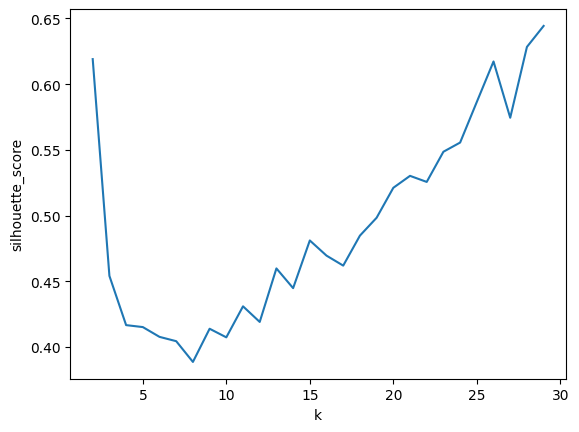

In [23]:
plt.plot(range(2,30), silhouette_score_list)
plt.xlabel('k')
plt.ylabel("silhouette_score")
plt.show()

In [24]:
inertias = [model.inertia_ for model in km_list]
inertias

[11137.736723639311,
 7254.022835331672,
 5690.593041671111,
 4799.91741844866,
 4234.666975562968,
 3783.407130439249,
 3345.210728306227,
 2981.352790912983,
 2745.4130964698384,
 2603.1263556494214,
 2414.85930254052,
 2288.1825159135055,
 2137.50694404698,
 1987.1375814445846,
 1898.8198318273612,
 1904.7463184767553,
 1747.3184792761624,
 1674.7864525317127,
 1585.2378422857346,
 1550.0467261127665,
 1451.8158257741331,
 1370.4804644303695,
 1321.5833647407758,
 1280.9129846164833,
 1218.1915272428046,
 1164.070400615476,
 1122.3882742864844,
 1039.457263685737]

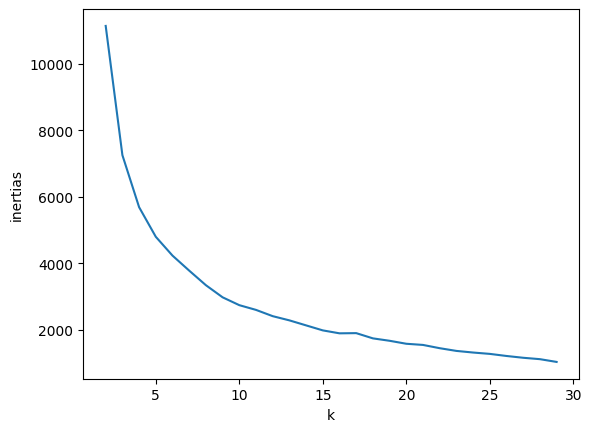

In [25]:
plt.plot(range(2,30), inertias)
plt.xlabel('k')
plt.ylabel("inertias")
plt.show()

Comprueba los resultados y muestra en un *pie plot* la distribución de los distintos *clusters*.

In [35]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)


In [27]:
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [28]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
3102,0
3103,1
3104,1
3105,0


<Axes: ylabel='count'>

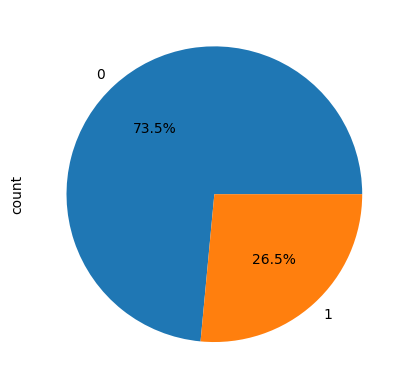

In [29]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [30]:
display(len(X), 0.735*len(X), 0.265*len(X))

3107

2283.645

823.355

In [31]:
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [32]:
X['cluster'] = kmeans.labels_
X.head()

,rating,effectiveness_int,sideEffects_int,cluster
0,4,4,1,1
1,1,4,3,1
2,10,4,0,0
3,3,1,1,1
4,2,1,3,1


In [33]:
X.groupby('cluster').mean()

,rating,effectiveness_int,sideEffects_int
cluster,,,
0,8.569615,3.422504,0.880473
1,2.667072,1.584447,2.482382


In [34]:
fig = px.box(X, x='cluster', y='sideEffects_int', color ='cluster')
fig.show()